<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Customer_Churn_Prediction_Using_Ensemble_Techniques_in_One_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction using Ensemble Techniques Project in One Shot**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churns.csv to Telco-Customer-Churns.csv


In [3]:
# Load the dataset
data = pd.read_csv('Telco-Customer-Churns.csv')

# Display the first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2: Data Preprocessing**

Since churn datasets often have categorical columns, encode these as numbers.

In [4]:
# Convert categorical columns to numerical values
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Define features (X) and target variable (y)
X = data.drop('Churn', axis=1)  # Adjust if 'Churn' is named differently
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 3: Ensemble Models**

1. **Random Forest-**  is a machine learning algorithm that combines the outputs of multiple decision trees to reach a single result. It's a popular algorithm that can be used for classification and regression problems.


Random Forest is an ensemble learning technique that builds multiple decision trees and combines their outputs to produce a more robust and accurate model. It is a type of bagging method, where each tree is trained on a random sample of the data (with replacement) and considers a random subset of features at each split, ensuring that the trees are less correlated. The final prediction is made by averaging (for regression) or majority voting (for classification) across all trees.

**Use:**

**Classification:** It’s widely used in tasks like image classification, spam detection, and customer churn prediction.
Regression: Often applied in fields like stock price prediction, real estate pricing, and environmental modeling.

**Advantages:**

**Robustness:** By averaging multiple trees, Random Forest reduces overfitting and enhances model stability, even with high-variance or noisy data.
Feature Importance: It provides estimates of feature importance, helping in understanding which features contribute the most to predictions.
Handling High Dimensionality: Effective in dealing with large datasets and many features due to its feature selection at each split.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7970191625266146


**2. Bagging Classifier**

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy data set. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

A Bagging (Bootstrap Aggregating) Classifier is an ensemble technique that trains multiple instances of the same model on different subsets of the data and combines their predictions for more stable and accurate results. In bagging, each model (often decision trees) is trained on a random sample with replacement (bootstrapping) from the original dataset, so each model sees a slightly different version of the data.

**The final prediction in bagging can be done by:**

**Voting** (for classification tasks) or

**Averaging** (for regression tasks)
Popular Example: Random Forest is a well-known bagging method that combines multiple decision trees.

**Use:**

Primarily used in tasks where variance reduction is needed, such as classification and regression tasks involving high-variance models like decision trees.
Applied to improve the robustness and accuracy of models in applications such as financial forecasting, disease prediction, and customer segmentation.

**Advantages:**

Reduces overfitting, especially for high-variance models, by averaging multiple predictions.
Increases model stability, making it less sensitive to outliers and small changes in the training data.

In [ ]:
# Bagging Classifier with updated 'estimator' parameter
bagging = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))



Bagging Classifier Accuracy: 0.7352732434350603


**3. AdaBoost**

**AdaBoost,** short for Adaptive Boosting, is an ensemble learning technique that combines multiple weak classifiers (often decision trees with a single split, or "stumps") to create a strong classifier. The algorithm gives more weight to instances that were misclassified in previous rounds, focusing subsequent classifiers on the harder-to-predict cases.

**Use:**

Commonly used in binary classification but can be extended to multi-class classification.
Applied in various fields such as image recognition, fraud detection, and customer churn prediction due to its simplicity and effectiveness on moderately sized datasets.
Key Features:

Boosting focuses on adjusting the weights of misclassified samples.
Models added sequentially, with each new model correcting the errors of the previous ones

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8062455642299503


**4. Gradient Boosting**

Gradient Boosting is another boosting technique that sequentially adds predictors to an ensemble, each trying to reduce the errors of the combined model. Instead of focusing directly on misclassified instances, Gradient Boosting minimizes a differentiable loss function (like mean squared error in regression) using gradient descent.

**Use:**

Widely used for structured/tabular data and regression tasks, such as predicting sales, and classification, like customer segmentation or credit scoring.
Common in competitions due to its accuracy, adaptability, and efficiency in handling large datasets.

**Key Features:**


Each new model aims to correct the residual errors of the previous models.
It leverages gradient descent to minimize the loss, which makes it highly customizable and adaptable.



In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.808374733853797


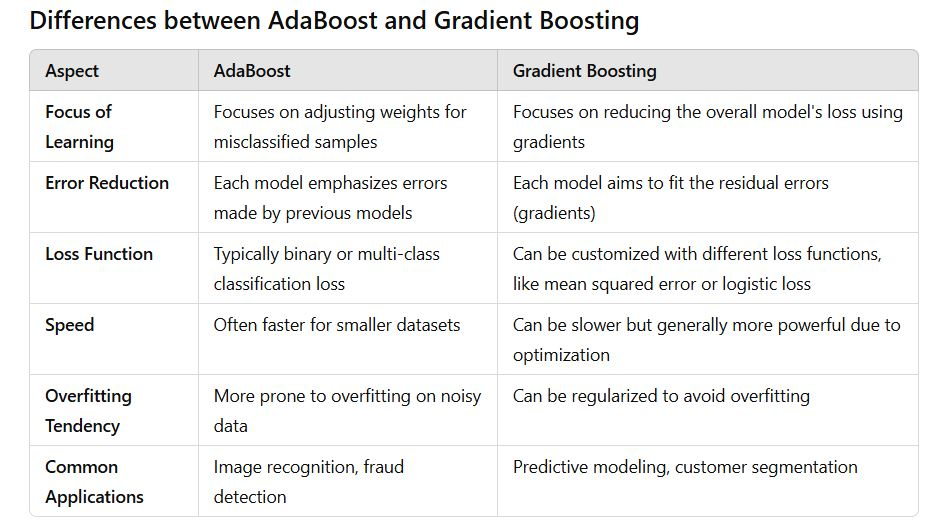

**5. Voting Classifier**

Combine all classifiers in a voting ensemble.

A Voting Classifier is an ensemble machine learning technique that combines predictions from multiple models to improve overall accuracy and stability. It leverages the "wisdom of the crowd" concept, where different models vote on the final prediction, either by majority (hard voting) or by averaging probabilities (soft voting).

**Types of Voting:**

Hard Voting: The final prediction is the most common (mode) prediction among the classifiers. It’s beneficial when you need more definitive answers and is often used for classification tasks.
Soft Voting: Uses the average of predicted probabilities, which gives more weight to the models with higher confidence in their predictions. Soft voting can provide better results if the models are well-calibrated.

**Use:**

Commonly used in classification problems where multiple models may have different strengths, such as in image classification, sentiment analysis, or customer segmentation.

Helpful when you have different models (e.g., decision trees, logistic regression, SVM) that each capture unique patterns in the data but may not individually perform well.

**Advantages:**
Can enhance overall accuracy by combining models with complementary strengths.
Provides robustness and reduces overfitting risks compared to using a single model.

In [ ]:
voting = VotingClassifier(estimators=[
    ('rf', rf), ('bagging', bagging), ('ada', ada), ('gb', gb)], voting='hard')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7927608232789212


**Visualization**

**Step 1: Churn Distribution Plot**

Churn- Manthan

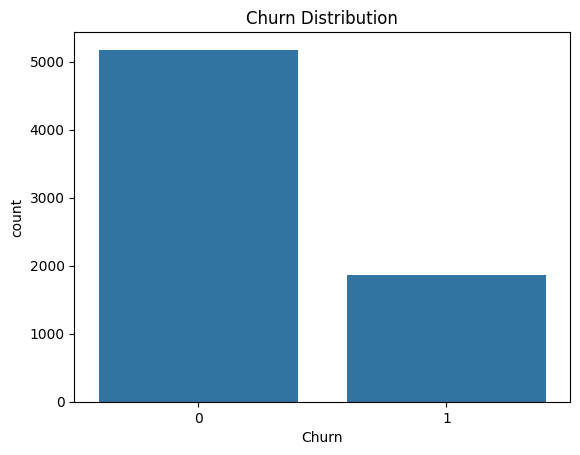

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


**Step 2: Pair Plot**

A pair plot provides a grid of scatter plots for each pair of numerical features, colored by the churn outcome.

In [ ]:
# Pair plot to visualize relationships between features and Churn
sns.pairplot(data, hue='Churn', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Features by Churn", y=1.02)
plt.show()


**Step 3: Correlation Heatmap**

The heatmap helps identify correlations between features and with the target variable.

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 4: Box Plot of Features by Churn**

Box plots show the distribution of features with respect to churn, which is useful to detect if a particular feature has different distributions for churned vs. non-churned customers.

In [ ]:
# Select numerical features only
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Box plot of numerical features by Churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
    plt.tight_layout()
plt.show()
